In [381]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [683]:
'''
Creating and generating Dataset
''' 

XData = []
yData = []
x = 0
y = 0
count = 0
for i in range(21):
    for j in range(21):
        temp = []
        x = -2 + (0.2*i)
        y = -2 + (0.2*j)
        x = round(x,1)
        y = round(y,1)
        if (x**2 + y**2 <= 1):
            label = 1
        else:
            label = -1
        temp.append(x)
        temp.append(y)
        XData.append(temp)
        yData.append(label)
        
        

XData = np.asarray(XData)
yData = np.asarray(yData)

'''
Randomizing the generated Data

'''
randomize = np.arange(len(XData))
np.random.shuffle(randomize)
XData = XData[randomize]
yData = yData[randomize]
'''
Dividing into Train and Test with 80:20 ratio

'''

Divide = int(len(XData) * 0.8)
X_TraData = XData[0:Divide+1]
X_TestData = XData[Divide+1:]
y_TraData = yData[0:Divide+1]
y_TestData = yData[Divide + 1:]
print(len(X_TraData), len(X_TestData))

353 88


In [684]:
print(X_TraData.shape)

(353, 2)


In [685]:
print(X_TestData.shape)

(88, 2)


In [686]:
class RBF():
    def __init__(self, kmeans = False):
        self.Layers = []
        self.NumClusters = 0
        self.centres = []
        self.NumHiddenNeurons = 0
        self.sigma = 0
        self.weightMatrix = []
        self.kmeans = kmeans
    def AddHiddenLayer(self, NumHiddenNeurons, sigma=0):
        self.NumHiddenNeurons = NumHiddenNeurons
        self.sigma = sigma
    def AddOutpoutLayer(self, NumOutputNeurons):
        self.NumOutputNeurons = NumOutputNeurons
    def CalculateCentres(self, X):
        if (self.kmeans == True):
            kmeans = KMeans(n_clusters = self.NumHiddenNeurons, random_state=0).fit(X)   
            ClusterCentres = kmeans.cluster_centers_
        else:
            ClusterCentres = X[np.random.choice(len(X), size=self.NumHiddenNeurons)]
            #print(ClusterCentres)
        return ClusterCentres
    def GaussianTransform(self,X, center):
        return np.exp(-1 / (2 * self.sigma**2)*np.linalg.norm(X-center)**2)
    def fit(self, X, y):
        self.centres = self.CalculateCentres(X)
        G = self.CalcG(X)
        #print(len(G), len(G[0]))
        y = np.asarray(y)
        y = y.reshape(-1, len(y))
        self.weightMatrix = np.dot(np.linalg.pinv(G), np.transpose(y))
        #print(self.weightMatrix.shape)
    def signum(self, X):
        x = np.where(X>=0, 1, -1)
        return x
    def Predict(self, X):
        G = self.CalcG(X)
        PredOut = np.dot(np.transpose(self.weightMatrix), np.transpose(G))
        PredOut = PredOut.flatten()
        PredOut = self.signum(PredOut)
        #print(PredOut.shape)
        return PredOut
    def CalcG(self, X):
        G = []
        for i in range(len(X)):
            PerInput = []
            for j in range(self.NumHiddenNeurons):
                out = self.GaussianTransform(X[i],self.centres[j])
                PerInput.append(out)
            G.append(PerInput)
        return G
    def CalcError(self, y_hat, y):
        sum = 0
        for i in range(len(y_hat)):
            meanSquare = np.linalg.norm(y-y_hat)
            sum = sum + meanSquare**2
        average = sum / len(y_hat)
        return average
    def CalcAccuracy(self, y_hat, y):
        sum = 0
        for i in range(len(y_hat)):
            if (y_hat[i] == y[i]):
                sum += 1
            ##else:
                ##print("index", i)
        accuracy = sum/len(y_hat)
        return accuracy

### Model Summary

An object of my model can be created using model = RBF(kmeans =True/False)
Here True indicates that, to select centres we use kmeans clustering and False indicates random selection of centres from the inputs.

model.AddHiddenLayer(n, sigma= i)

We add a hidden layer with 'n' neurons and a constant sigma for all gaussian kernels.

model.AddOutpoutLayer(1)

As there are only 2 classes, we have one output neuron with a signum activation function.


## Part 1 - Trainng the model with all Training DataPoints as the Centres


In [688]:
'''
Creating List for different sigma values
'''
SigmaList = [0.01,0.05, 0.1, 0.25, 0.5, 0.75, 1, 1.5, 2, 2.5, 3, 5, 10]

### Design Summary

#### Here we take all the input neurons as the centres in hidden layer and hence I passed len(X_TraData) as the number of hidden layer neurons.
#### Sigma values are ranging from 0.01 to 10. I observed that the values get saturated beyond 10.

#### Reported the Train accuracy, Test Accuracy and mean squared error for test data set and plotted graphs.

In [689]:
%%time
model = RBF(kmeans = False)
AccArray = []
ErrArray = []
maxaccuracy = 0
maxSigma = 0
for i in SigmaList:   
    model.AddHiddenLayer(len(X_TraData), sigma=i)
    model.AddOutpoutLayer(1)
    model.fit(X_TraData, y_TraData)
    y_pred_train = model.Predict(X_TraData)
    y_pred_test = model.Predict(X_TestData)
    accuracyTrain = model.CalcAccuracy(y_pred_train, y_TraData)
    accuracyTest = model.CalcAccuracy(y_pred_test, y_TestData)
    Error = model.CalcError(y_pred_test, y_TestData)
    print("delta", i , "\n\t", "Accuracy Train ", accuracyTrain, "\n\t", "Accuracy Test ", accuracyTest, "\n\t", "mean square error", Error)
    AccArray.append(accuracyTest)
    ErrArray.append(Error)
    if(accuracyTest > maxaccuracy):
        maxaccuracy= accuracyTest
        maxSigma = i

delta 0.01 
	 Accuracy Train  0.9745042492917847 
	 Accuracy Test  0.9204545454545454 
	 mean square error 28.000000000000004
delta 0.05 
	 Accuracy Train  0.9943342776203966 
	 Accuracy Test  0.9659090909090909 
	 mean square error 11.999999999999998
delta 0.1 
	 Accuracy Train  0.9886685552407932 
	 Accuracy Test  0.9318181818181818 
	 mean square error 23.999999999999996
delta 0.25 
	 Accuracy Train  1.0 
	 Accuracy Test  0.9545454545454546 
	 mean square error 16.0
delta 0.5 
	 Accuracy Train  1.0 
	 Accuracy Test  0.9318181818181818 
	 mean square error 23.999999999999996
delta 0.75 
	 Accuracy Train  1.0 
	 Accuracy Test  0.9659090909090909 
	 mean square error 11.999999999999998
delta 1 
	 Accuracy Train  0.9915014164305949 
	 Accuracy Test  0.9431818181818182 
	 mean square error 20.000000000000004
delta 1.5 
	 Accuracy Train  0.9886685552407932 
	 Accuracy Test  0.9545454545454546 
	 mean square error 16.0
delta 2 
	 Accuracy Train  0.9886685552407932 
	 Accuracy Test  1.0 
	 

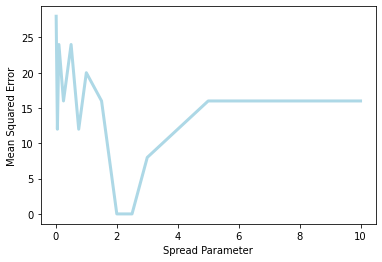

In [690]:
plt.figure()
plt.xlabel("Spread Parameter")
plt.ylabel("Mean Squared Error")
plt.plot(SigmaList , ErrArray, color='lightblue', linewidth=3)
plt.show()

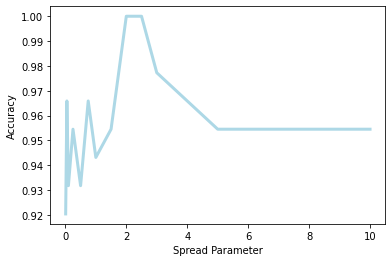

In [691]:
plt.figure()
plt.xlabel("Spread Parameter")
plt.ylabel("Accuracy")
plt.plot(SigmaList , AccArray, color='lightblue', linewidth=3)
plt.show()

In [692]:
print("Max Accuracy = ", maxaccuracy, " for a Spread Parameter of ", maxSigma)

Max Accuracy =  1.0  for a Spread Parameter of  2


### Best Accuracy is obtained at Sigma = 2 , and the Accuracy is 1.0

### Running Time - 35.1 s

## Part 2
a) Choosing 150 random points as Centres

### Design Summary

#### Here we take 150 random centres as the number of hidden layer neurons. Hence the kmeans parameter is set to False
#### Sigma values are ranging from 0.01 to 10. I observed that the values get saturated beyond 10.

In [695]:
%%time
AccArray1 = []
ErrArray1 = []
maxaccuracy1 = 0
maxSigma1 = 0
model1 = RBF(kmeans = False)
for i in SigmaList:   
    model1.AddHiddenLayer(150, sigma=i)
    model1.AddOutpoutLayer(1)
    model1.fit(X_TraData, y_TraData)
    y_pred_train1 = model1.Predict(X_TraData)
    y_pred_test1 = model1.Predict(X_TestData)
    accuracyTrain1 = model1.CalcAccuracy(y_pred_train1, y_TraData)
    accuracyTest1 = model1.CalcAccuracy(y_pred_test1, y_TestData)
    Error1 = model1.CalcError(y_pred_test1, y_TestData)
    print("delta", i , "\n\t", "Accuracy Train ", accuracyTrain1, "\n\t", "Accuracy Test ", accuracyTest1, "\n\t", "mean square error", Error1)
    AccArray1.append(accuracyTest1)
    ErrArray1.append(Error1)
    if(accuracyTest1 > maxaccuracy1):
        maxaccuracy1 = accuracyTest1
        maxSigma1 = i

delta 0.01 
	 Accuracy Train  0.8980169971671388 
	 Accuracy Test  0.8863636363636364 
	 mean square error 40.00000000000001
delta 0.05 
	 Accuracy Train  0.9575070821529745 
	 Accuracy Test  0.9204545454545454 
	 mean square error 28.000000000000004
delta 0.1 
	 Accuracy Train  0.9688385269121813 
	 Accuracy Test  0.9431818181818182 
	 mean square error 20.000000000000004
delta 0.25 
	 Accuracy Train  0.9943342776203966 
	 Accuracy Test  0.9431818181818182 
	 mean square error 20.000000000000004
delta 0.5 
	 Accuracy Train  0.9886685552407932 
	 Accuracy Test  0.9772727272727273 
	 mean square error 8.000000000000002
delta 0.75 
	 Accuracy Train  0.9886685552407932 
	 Accuracy Test  0.9659090909090909 
	 mean square error 11.999999999999998
delta 1 
	 Accuracy Train  0.9886685552407932 
	 Accuracy Test  0.9545454545454546 
	 mean square error 16.0
delta 1.5 
	 Accuracy Train  0.9886685552407932 
	 Accuracy Test  0.9659090909090909 
	 mean square error 11.999999999999998
delta 2 
	 Acc

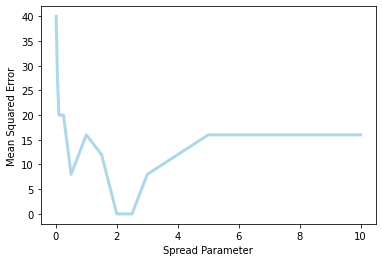

In [696]:
plt.figure()
plt.xlabel("Spread Parameter")
plt.ylabel("Mean Squared Error")
plt.plot(SigmaList , ErrArray1, color='lightblue', linewidth=3)
plt.show()

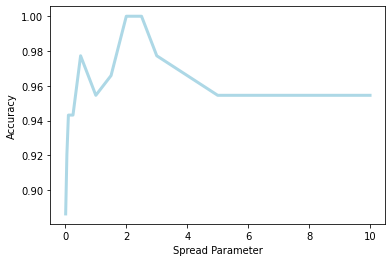

In [697]:
plt.figure()
plt.xlabel("Spread Parameter")
plt.ylabel("Accuracy")
plt.plot(SigmaList , AccArray1, color='lightblue', linewidth=3)
plt.show()

In [698]:
print("Max Accuracy = ", maxaccuracy1, " for a Spread Parameter of ", maxSigma1)

Max Accuracy =  1.0  for a Spread Parameter of  2


### Best Accuracy is obtained at Sigma = 2 , and the Accuracy is 1.0

### Running Time - 15.8 s


b) Using K-Means Clustering to get 150 centres.


### Design Summary

#### Here we compute 150 centres using kmeans clustering as the number of hidden layer neurons. Hence the kmeans parameter is set to True.
#### Sigma values are ranging from 0.01 to 10. I observed that the values get saturated beyond 10.

In [700]:
%%time
AccArray2 = []
ErrArray2 = []
maxaccuracy2 = 0
maxSigma2 = 0
model2 = RBF(kmeans = True)
for i in SigmaList:   
    model2.AddHiddenLayer(150, sigma=i)
    model2.AddOutpoutLayer(1)
    model2.fit(X_TraData, y_TraData)
    y_pred_train2 = model2.Predict(X_TraData)
    y_pred_test2 = model2.Predict(X_TestData)
    accuracyTrain2 = model2.CalcAccuracy(y_pred_train2, y_TraData)
    accuracyTest2 = model2.CalcAccuracy(y_pred_test2, y_TestData)
    Error2 = model2.CalcError(y_pred_test2, y_TestData)
    print("delta", i , "\n\t", "Accuracy Train ", accuracyTrain2, "\n\t", "Accuracy Test ", accuracyTest2, "\n\t", "mean square error", Error2)
    AccArray2.append(accuracyTest2)
    ErrArray2.append(Error2)
    if(accuracyTest2 > maxaccuracy2):
        maxaccuracy2 = accuracyTest2
        maxSigma2 = i

delta 0.01 
	 Accuracy Train  0.6572237960339944 
	 Accuracy Test  0.7045454545454546 
	 mean square error 103.99999999999999
delta 0.05 
	 Accuracy Train  0.9830028328611898 
	 Accuracy Test  0.9431818181818182 
	 mean square error 20.000000000000004
delta 0.1 
	 Accuracy Train  0.9858356940509915 
	 Accuracy Test  0.9545454545454546 
	 mean square error 16.0
delta 0.25 
	 Accuracy Train  0.9971671388101983 
	 Accuracy Test  0.9431818181818182 
	 mean square error 20.000000000000004
delta 0.5 
	 Accuracy Train  0.9971671388101983 
	 Accuracy Test  0.9431818181818182 
	 mean square error 20.000000000000004
delta 0.75 
	 Accuracy Train  0.9943342776203966 
	 Accuracy Test  0.9545454545454546 
	 mean square error 16.0
delta 1 
	 Accuracy Train  0.9886685552407932 
	 Accuracy Test  0.9772727272727273 
	 mean square error 8.000000000000002
delta 1.5 
	 Accuracy Train  0.9886685552407932 
	 Accuracy Test  0.9545454545454546 
	 mean square error 16.0
delta 2 
	 Accuracy Train  0.988668555240

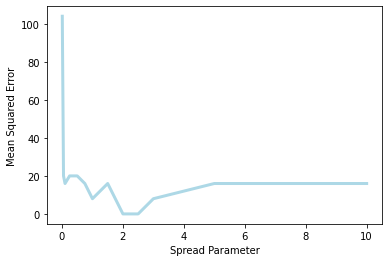

In [701]:
plt.figure()
plt.xlabel("Spread Parameter")
plt.ylabel("Mean Squared Error")
plt.plot(SigmaList , ErrArray2, color='lightblue', linewidth=3)
plt.show()

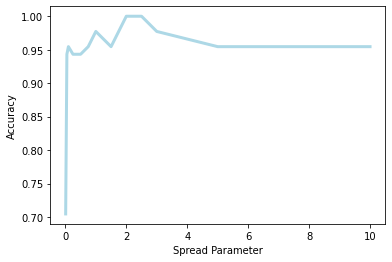

In [702]:
plt.figure()
plt.xlabel("Spread Parameter")
plt.ylabel("Accuracy")
plt.plot(SigmaList , AccArray2, color='lightblue', linewidth=3)
plt.show()

In [703]:
print("Max Accuracy = ", maxaccuracy2, " for a Spread Parameter of ", maxSigma2)

Max Accuracy =  1.0  for a Spread Parameter of  2


### Best Accuracy is obtained at Sigma = 2.5 , and the Accuracy is 1.0

### Running Time - 19.4 s

## Comparing the Designs

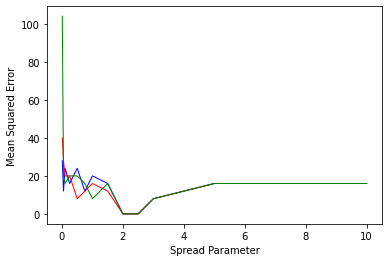

In [704]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(SigmaList , ErrArray, color='blue', linewidth=1)
ax.plot(SigmaList , ErrArray1, color='red', linewidth=1)
ax.plot(SigmaList , ErrArray2, color='green', linewidth=1)
plt.xlabel("Spread Parameter")
plt.ylabel("Mean Squared Error")
plt.show()

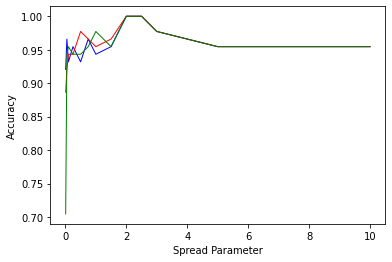

In [705]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(SigmaList , AccArray, color='blue', linewidth=1)
ax.plot(SigmaList , AccArray1, color='red', linewidth=1)
ax.plot(SigmaList , AccArray2, color='green', linewidth=1)
plt.xlabel("Spread Parameter")
plt.ylabel("Accuracy")
plt.show()

## From the above plots and runs we observe that-
1. For all the 3 cases, the maximum accuracy obtained is at sigma=2, which indicates that the spread parameter is independent on the number of centres to be choosen. In my observation I got Maximum accuracy of 1 for the case where sigma = 2. For all three cases I got the accuracy to be 1 at sigma = 2.  

2. In general as the number of centres reduces the accuracy reduces for a constant sigma, but in my run I got same accuracy for total number of centres equal to total number of data points as well as for the case where we consider 150 centres. Hence I tried reducing the number of centres further to check what exactly happens to the accuracy when we reduce the number of centres, I observed that the accuracy reduces, and, for sigma=2, and number of centres = 50, I got an accuracy of 95.4%( which is less than 100% for the other cases.(I have reported this run below as it is not asked for in the question). Hence I concluded that, lesser the number of hidden neurons lesser the accuracy.

3. The time taken to compute for the 1st case(centres=input size) is greater than that for 150 centres, and selecting 150 centres randomly is faster than computing the 150 centres using KMeans Clustering, but KMeans Clustering gives a reliable model for every run, where as slecting centres randomly generate different results in each run.


In [707]:
%%time
AccArray3 = []
ErrArray3 = []
maxaccuracy3 = 0
maxSigma3 = 0
model3 = RBF(kmeans = True)
for i in SigmaList:   
    model3.AddHiddenLayer(50, sigma=i)
    model3.AddOutpoutLayer(1)
    model3.fit(X_TraData, y_TraData)
    y_pred_train3 = model3.Predict(X_TraData)
    y_pred_test3 = model3.Predict(X_TestData)
    accuracyTrain3 = model3.CalcAccuracy(y_pred_train3, y_TraData)
    accuracyTest3 = model3.CalcAccuracy(y_pred_test3, y_TestData)
    Error3 = model3.CalcError(y_pred_test3, y_TestData)
    print("delta", i , "\n\t", "Accuracy Train ", accuracyTrain3, "\n\t", "Accuracy Test ", accuracyTest3, "\n\t", "mean square error", Error3)
    AccArray3.append(accuracyTest3)
    ErrArray3.append(Error3)
    if(accuracyTest3 > maxaccuracy3):
        maxaccuracy3 = accuracyTest3
        maxSigma3 = i

delta 0.01 
	 Accuracy Train  0.7648725212464589 
	 Accuracy Test  0.7386363636363636 
	 mean square error 91.99999999999999
delta 0.05 
	 Accuracy Train  0.9518413597733711 
	 Accuracy Test  0.9431818181818182 
	 mean square error 20.000000000000004
delta 0.1 
	 Accuracy Train  0.9518413597733711 
	 Accuracy Test  0.9431818181818182 
	 mean square error 20.000000000000004
delta 0.25 
	 Accuracy Train  0.9773371104815864 
	 Accuracy Test  0.9318181818181818 
	 mean square error 23.999999999999996
delta 0.5 
	 Accuracy Train  0.9858356940509915 
	 Accuracy Test  0.9545454545454546 
	 mean square error 16.0
delta 0.75 
	 Accuracy Train  0.9858356940509915 
	 Accuracy Test  0.9545454545454546 
	 mean square error 16.0
delta 1 
	 Accuracy Train  0.9858356940509915 
	 Accuracy Test  0.9545454545454546 
	 mean square error 16.0
delta 1.5 
	 Accuracy Train  0.9830028328611898 
	 Accuracy Test  0.9545454545454546 
	 mean square error 16.0
delta 2 
	 Accuracy Train  0.9830028328611898 
	 Accura

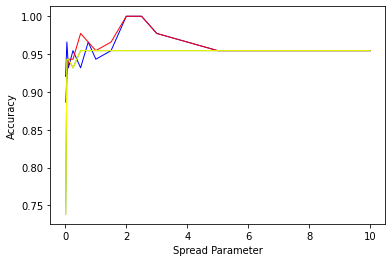

In [709]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(SigmaList , AccArray, color='blue', linewidth=1)
ax.plot(SigmaList , AccArray1, color='red', linewidth=1)
ax.plot(SigmaList , AccArray2, color='green', linewidth=1)
ax.plot(SigmaList , AccArray3, color='yellow', linewidth=1)

plt.xlabel("Spread Parameter")
plt.ylabel("Accuracy")
plt.show()